In [1]:
import numpy as np

In [2]:
with open('../data/day_07_puzzle_1', 'r') as f:
    crab_positions_raw = f.readlines()

In [3]:
crab_positions = [pos.split(',') for pos in crab_positions_raw]
crab_positions = [int(pos) for pos in crab_positions[0]]
crab_positions = np.array(crab_positions)
print('top 5', crab_positions[:5], 'bottom 5', crab_positions[-5:])

top 5 [1101    1   29   67 1102] bottom 5 [743 850  25 136 241]


In [4]:
example = [16,1,2,0,4,2,7,1,2,14]

In [5]:
crab_alignment_position = np.median(crab_positions).astype(int)
crab_alignment_position

362

In [6]:
fuel_requirement = np.abs(crab_positions - crab_alignment_position)
fuel_requirement.sum()

342534

# puzzle 2

In [7]:
import matplotlib.pyplot as plt

In [8]:
# crab_positions = np.array(example)
mileage_map = np.zeros((crab_positions.shape[0], 1 + np.abs(crab_positions.min() - crab_positions.max())))
mileage_map.shape

(1000, 1937)

In [9]:
mileage_map[range(mileage_map.shape[0]), crab_positions] = crab_positions

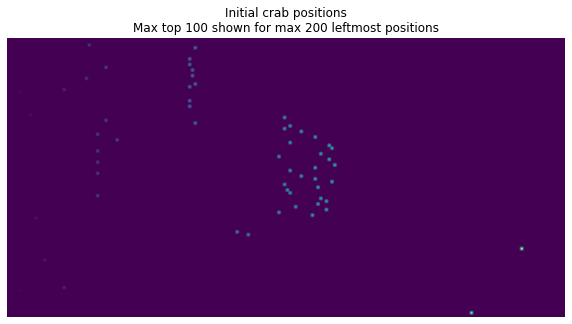

In [10]:
# will not be very interesting when showing more than ~100 crabs
plt.figure(figsize=[10,20])
plt.imshow(mileage_map[:100, :200])
plt.title('Initial crab positions\nMax top 100 shown for max 200 leftmost positions')
plt.axis(False)
plt.show()

In [11]:
from typing import Union
def pairwise_sum(array: Union[np.array, list]) -> np.array:
    if isinstance(array, list):
        array = np.array(array)
    sum = []
    for ind in range(array.shape[0]):
        if ind == 0:
            sum.append(array[ind])
        else:
            sum.append(array[ind] + sum[ind-1])
    return np.array(sum)

In [12]:
def fuel_consumption(position: int, min: int, max: int) -> np.array:
    if not min < max:
        raise ValueError(f"Min is {min} which is larger than max {max}")
    
    right = np.array([i for i in range(1, 1 + np.abs(position - max))])
    right = pairwise_sum(right)

    left = np.array([i for i in range(1, 1 + np.abs(position - min))])
    left = pairwise_sum(left)
    left = np.flip(left)

    if (right.shape[0] > 0) and (left.shape[0] > 0):
        total = np.concatenate((left, [0], right))
    elif position == min:
        total = np.concatenate(([0], right))
    elif position == max:
        total = np.concatenate((left, [0]))

    return total

In [13]:
min = crab_positions.min()
max = crab_positions.max()
print(f'Min possible position is {min} and max is {max}')
for crab, position in enumerate(crab_positions):
    mileage_map[crab, :] = fuel_consumption(position, min, max)

Min possible position is 0 and max is 1936


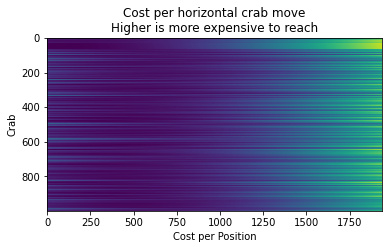

In [14]:
plt.imshow(mileage_map)
plt.title('Cost per horizontal crab move\nHigher is more expensive to reach')
# plt.axis(False)
plt.xlabel('Cost per Position')
plt.ylabel('Crab')
plt.show()

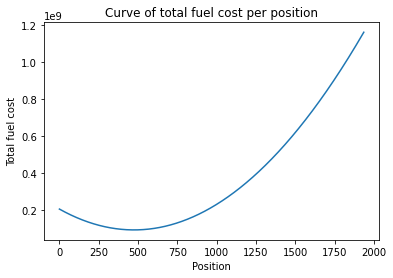

In [15]:
plt.plot(mileage_map.sum(axis=0))
plt.title('Curve of total fuel cost per position')
plt.xlabel('Position')
plt.ylabel('Total fuel cost')
plt.show()

In [16]:
optimal_position = np.where(mileage_map.sum(axis=0) == mileage_map.sum(axis=0).min())[0][0]
total_fuel_cost = mileage_map.sum(axis=0)[optimal_position]
print(f'Optimal position is {optimal_position}')
print(f'The total fuel cost will be {int(total_fuel_cost)}')

Optimal position is 474
The total fuel cost will be 94004208
